# Fitting data to AA

Fitting a simple hyperbolic function worked before

In [4]:
from scipy.optimize import minimize
from matplotlib import pyplot as plt

import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline

def set_mpl_params_meeting(matplotlib):
    plt.figure(figsize=(6,4), dpi=100)
    # formatting plots
    font = {'family' : 'monospace', 'size'   : 10, 'sans-serif':'Nimbus'}
    lines = {"linewidth": 2}

    matplotlib.rc('font', **font)
    matplotlib.rc('lines', **lines)

def scipy_fit(fn, train_sizes, mean):
    def fx(args):
        x = np.array(train_sizes)
        predict = fn(x, *args)
        true = mean
        error = np.mean((predict - mean)**2)
        return error
    params = minimize(fx, (0.7, 2, 0.55))
    return params

def get_y(fn, params, x):
    return fn(x, *params)

#plot the predicted and true values
def plot_fit_and_true(y_predict, y_true, x):
    set_mpl_params_meeting(matplotlib)
    plt.plot(x, y_true, color="tab:green")
    plt.scatter(x, y_true, color="tab:green", label="true")

    plt.plot(x, y_predict, color="tab:orange")
    plt.scatter(x, y_predict, color="tab:orange", label="predicted")
    
    plt.grid()
    plt.legend()
    

def fit_data(df_a, fn):
    fit = scipy_fit(fn, df_a.train_size//1000, df_a.mean_vals)
    fit_params = fit.x
    return fit_params

def compute_rmse(pred, true):
    return np.mean((pred-true)**2)

def fit_data_and_check(path_to_csv):
    df = pd.read_csv(path_to_csv)
    x = df.train_size//1000
    y = df.mean_vals
    
    fn = lambda x,a,b,c: -a + c/x**b # hyperbolic function being fit to data 
    fit_obj = scipy_fit(fn, x, y)
    fit_params = fit_obj.x
    
    y_pred = get_y(fn, fit_params, x)
    
    # compute errors for quantitative check
    rmse = compute_rmse(y_pred, y)
    r2   = np.corrcoef(y_pred, y)
    print(f"rmse : {rmse},\nr2 :\n {r2}")
    
    # plot the fit and true data for visual checks
    plot_fit_and_true(y_pred, y, x)
    
    return y_pred, fit_params, x, y

In [ ]:
os.chdir("/projappl/project_2000382/ghoshkun/code/Multi_Fidelity_Prediction_GP/mfgp/task1_new/puhti_runs")
# print(os.getcwd())
# !module load python-data/3.7.6-1
# !python -m pip install jupytext
!python -m jupytext --sync Datasavings.ipynb

rmse : 2.3846085879228656e-06,
r2 :
 [[1.         0.99987614]
 [0.99987614 1.        ]]


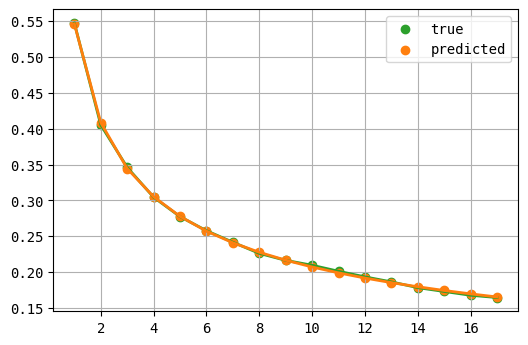

In [5]:
# computations for AA
y_predict_aa, fit_params_aa, x, y_true_aa = fit_data_and_check("csv_files/old_csvs/Active_learning_results - AA_A_1k.csv")

aa_d = pd.read_csv("csv_files/old_csvs/Active_learning_results - AA_D_1k.csv")
aa_vals = (y_true_aa, aa_d.mean_vals, y_predict_aa, x)

rmse : 7.055898317208754e-07,
r2 :
 [[1.         0.99952898]
 [0.99952898 1.        ]]


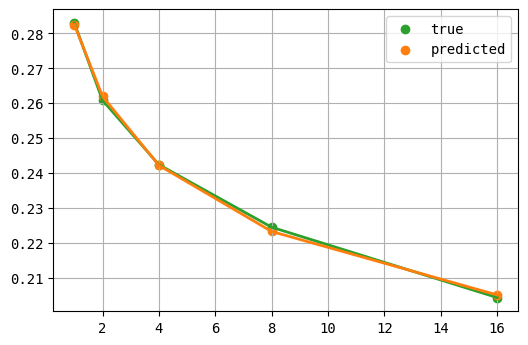

In [6]:
# Computations for QM9
y_predict_qm9, fit_params_qm9, x, y_true_qm9 = fit_data_and_check("csv_files/old_csvs/Active_learning_results - QM9_A_EXP.csv")

qm9_d = pd.read_csv("csv_files/old_csvs/Active_learning_results - QM9_D_EXP.csv")
qm9_vals = (y_true_qm9, qm9_d.mean_vals, y_predict_qm9, x)

rmse : 4.7724400737486274e-06,
r2 :
 [[1.         0.99414364]
 [0.99414364 1.        ]]


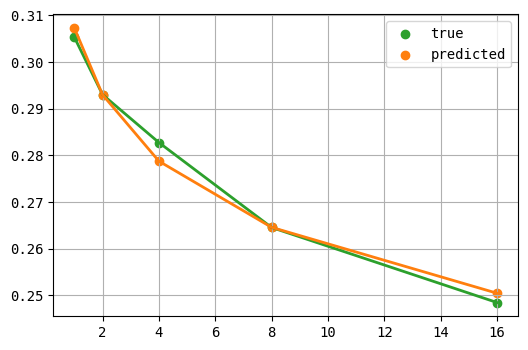

In [7]:
# Computations for OE
y_predict_oe, fit_params_oe, x, y_true_oe = fit_data_and_check("csv_files/old_csvs/Active_learning_results - OE_A_EXP.csv")

oe_d = pd.read_csv("csv_files/old_csvs/Active_learning_results - OE_D_EXP.csv")
oe_vals = (y_true_oe, oe_d.mean_vals, y_predict_oe, x)

error : 0.0013385549181938428, r2 : [[1.         0.99987614]
 [0.99987614 1.        ]]


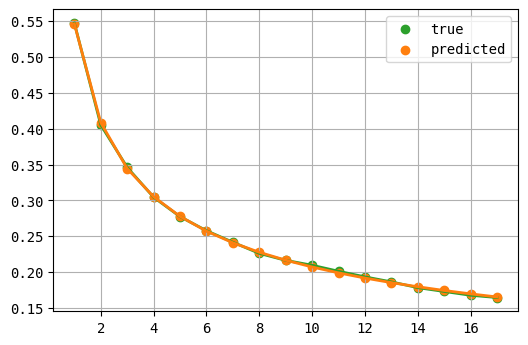

In [46]:
# AA data
aa_d_1k = pd.read_csv("csv_files/old_csvs/Active_learning_results - AA_D_1k.csv")
aa_a_1k = pd.read_csv("csv_files/old_csvs/Active_learning_results - AA_A_1k.csv")

fn_aa = lambda x,a,b,c: -a + c/x**b

fit_aa = scipy_fit(fn_aa, aa_a_1k.train_size//1000, aa_a_1k.mean_vals)
fit_params_aa = fit_aa.x

y_predict_aa = get_y(fn_aa, fit_params_aa, aa_a_1k.train_size//1000)
error = np.mean(np.abs(y_predict_aa - aa_a_1k.mean_vals))
r2 = np.corrcoef(y_predict_aa, aa_a_1k.mean_vals)
print(f"error : {error}, r2 : {r2}")

plot_fit_and_true(y_predict_aa, aa_a_1k.mean_vals, aa_a_1k.train_size//1000)

aa_vals = (aa_a_1k.mean_vals, aa_d_1k.mean_vals, y_predict_aa, aa_a_1k.train_size//1000)

error : 0.0007433523009378773, r2 : [[1.         0.99952898]
 [0.99952898 1.        ]]


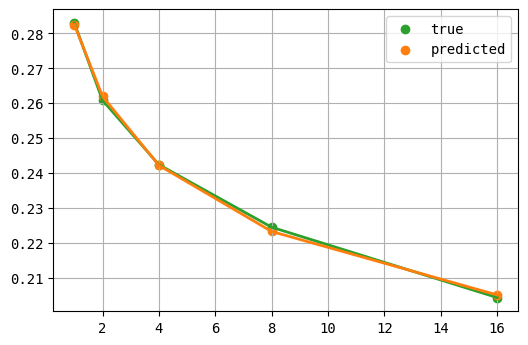

In [47]:
# QM9 data
qm9_d_1k = pd.read_csv("csv_files/old_csvs/Active_learning_results - QM9_D_EXP.csv")
qm9_a_1k = pd.read_csv("csv_files/old_csvs/Active_learning_results - QM9_A_EXP.csv")

fn_qm9 = lambda x,a,b,c: -a + c/x**b

fit_qm9 = scipy_fit(fn_qm9, qm9_a_1k.train_size//1000, qm9_a_1k.mean_vals)
fit_params_qm9 = fit_qm9.x



y_predict_qm9 = get_y(fn_qm9, fit_params_qm9, qm9_a_1k.train_size//1000)
error = np.mean(np.abs(y_predict_qm9 - qm9_a_1k.mean_vals))
r2 = np.corrcoef(y_predict_qm9,qm9_a_1k.mean_vals)
print(f"error : {error}, r2 : {r2}")

plot_fit_and_true(y_predict_qm9, qm9_a_1k.mean_vals, qm9_a_1k.train_size//1000)
qm9_vals = (qm9_a_1k.mean_vals, qm9_d_1k.mean_vals, y_predict_qm9, qm9_a_1k.train_size//1000)

error : 0.001606023561137432, r2 : [[1.         0.99414364]
 [0.99414364 1.        ]]


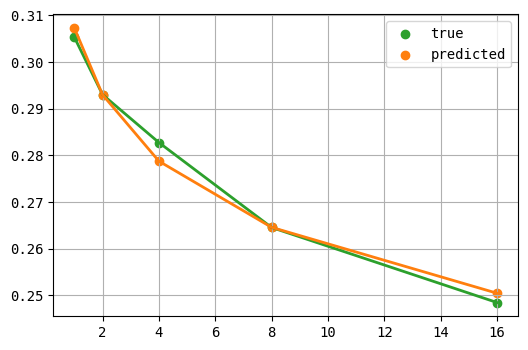

In [48]:
# OE data
oe_d_1k = pd.read_csv("csv_files/old_csvs/Active_learning_results - OE_D_EXP.csv")
oe_a_1k = pd.read_csv("csv_files/old_csvs/Active_learning_results - OE_A_EXP.csv")

fn_oe = lambda x,a,b,c: -a + c/x**b

fit_oe = scipy_fit(fn_oe, oe_a_1k.train_size//1000, oe_a_1k.mean_vals)
fit_params_oe = fit_oe.x



y_predict_oe = get_y(fn_oe, fit_params_oe, oe_a_1k.train_size//1000)
error = np.mean(np.abs(y_predict_oe - oe_a_1k.mean_vals))
r2 = np.corrcoef(y_predict_oe,oe_a_1k.mean_vals)
print(f"error : {error}, r2 : {r2}")

plot_fit_and_true(y_predict_oe, oe_a_1k.mean_vals, oe_a_1k.train_size//1000)
oe_vals = (oe_a_1k.mean_vals, oe_d_1k.mean_vals, y_predict_oe, oe_a_1k.train_size//1000)

# Plot predicted_a and true_a and true_d in same plot

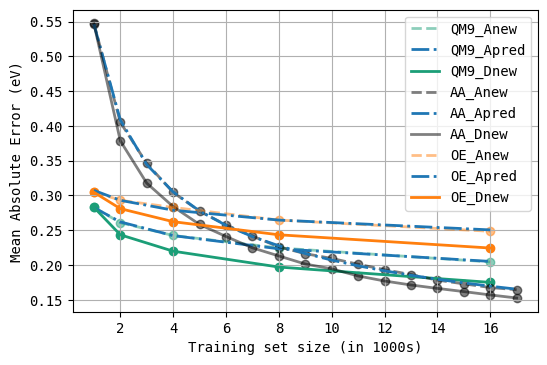

In [8]:
def plot(aa_vals, oe_vals, qm9_vals):
    aa_a_m_true, aa_d_m_true, aa_a_m_pred, aa_x = aa_vals
    oe_a_m_true, oe_d_m_true, oe_a_m_pred, oe_x = oe_vals
    qm9_a_m_true, qm9_d_m_true, qm9_a_m_pred, qm9_x = qm9_vals
    
    set_mpl_params_meeting(matplotlib)
    
    # ------------ QM9 -------------        
    plt.plot(qm9_x, qm9_a_m_true, "--" , color="#1b9e77", alpha=0.5, label="QM9_Anew")
    plt.plot(qm9_x, qm9_a_m_pred, "-." , color="tab:blue", alpha=1, label="QM9_Apred")
    plt.scatter(qm9_x, qm9_a_m_true, color="#1b9e77", alpha =0.5)
    
    plt.plot(qm9_x, qm9_d_m_true, color="#1b9e77", label="QM9_Dnew")
    plt.scatter(qm9_x, qm9_d_m_true, color="#1b9e77")
    
    # ------------ AA -------------
    plt.plot(aa_x, aa_a_m_true, "--" , color="k", alpha=0.5, label="AA_Anew")
    plt.plot(aa_x, aa_a_m_pred, "-." , color="tab:blue", alpha=1, label="AA_Apred")
    plt.scatter(aa_x, aa_a_m_true, color="k", alpha=0.5)
    
    plt.plot(aa_x, aa_d_m_true, color="k", alpha=0.5, label="AA_Dnew")
    plt.scatter(aa_x, aa_d_m_true, color="k", alpha=0.5)
    # ------------ OE -------------
    plt.plot(oe_x, oe_a_m_true, "--" , color="tab:orange", alpha=0.5, label="OE_Anew")
    plt.plot(oe_x, oe_a_m_pred, "-." , color="tab:blue", alpha=1, label="OE_Apred")
    plt.scatter(oe_x, oe_a_m_true, color="tab:orange", alpha=0.5)
    
    plt.plot(oe_x, oe_d_m_true, color="tab:orange", label="OE_Dnew")
    plt.scatter(oe_x, oe_d_m_true, color="tab:orange")
    
    #plt.xticks(batch_size)
    # plt.xscale("linear")
    plt.legend()
    plt.xlabel("Training set size (in 1000s)")
    plt.ylabel("Mean Absolute Error (eV)")
    plt.grid()

plot(aa_vals, oe_vals, qm9_vals)